# Propedeutic functions

**Function to store numpy embeddings in a .csv file**

In [1]:
import csv

def save_embedding_label_dataset(dataset: str, embedding_type: str, model_version:str, X, y):    
    with open(f"{dataset}/{model_version}-{embedding_type}.csv", "w", newline='') as f:
        writer = csv.writer(f)
        for xi, yi in zip(X, y):
            writer.writerow(list(xi) + [yi])

**Function to load embeddings from a .csv to a numpy embeddings**

In [2]:
def load_embedding_label_dataset(dataset: str, embedding_type: str, model_version: str):
    data = np.loadtxt(f"{dataset}/{model_version}-{embedding_type}.csv", delimiter=",")
    X = data[:, :-1]
    y = data[:, -1]
    
    return X,y

Function to evaluate model performance

In [3]:
def evaluate_metrics(clf, X_test, y_test, classes_mlp):
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    # Evaluate
    print(f"\nDataset labels:----------------------------------------\n{classes_mlp}\n")
    print(f"Report-------------------------------------------------")
    print(classification_report(y_test, y_pred, target_names=classes_mlp.keys()))

    print(f"Confusion matrix---------------------------------------")
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes_mlp.keys())
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()

# MODEL 4, DATASET 2, EMBEDDING SUPREMO
Exploits model 4 to extract following keypoints: [eyes, nose, mouth]

Then create an embedding with keypoints positions, flag, head angle and other info derived from the keypoints

.

Exploits different classification methods in order to predict on back/on stomach labels

Optimal feature analysis and hyper parameter optimization are exploited in order to optimize del classification performances

BEST RESULT: RANDOM FOREST WITH ALL FEATURES EMBEDDING

In [4]:
model_version = "4"
dataset_folder = "datasets/onback_onstomach_v2"
embedding_type = "supremo"

**Import dependencies**

In [5]:
import numpy as np
from ultralytics import YOLO

import os
from pathlib import Path
import cv2

In [ ]:
def move_to_project_folder(file: str):
    possible_paths = [
        Path().resolve(),
        Path("/home/terra/Documents/AI_engineering/SIDS-project/python_project/SIDS_revelation_project"),
        Path(" ")  # percorso di Lore
    ]

    for path in possible_paths:
        try:
            full_path = path / file
            if full_path.exists():
                os.chdir(full_path.parent)
                print(f"Moved to {full_path.parent}")
                break

        except FileNotFoundError:
            pass
    else:
        raise RuntimeError("No model loaded, all paths were invalid.")

move_to_project_folder("baseline/model4_dataset2_topfeatures.ipynb")
import embeddings

**Choose how to process the dataset:**
1. extracting keypoints and labels
2. extracting keypoints and labels and saving predicted images with bboxes
3. loading keypoint and labels

1. **Load model and process the dataset (extract keypoints from every image in the dataset and the corresponding label)**

In [ ]:
emb_builder = embeddings.EmbeddingBuilder(f"models/{model_version}.weights/best.pt", dataset_folder)
emb_builder.process_dataset()

2. **Load model and process the dataset(extract keypoints from every image in the dataset, the corresponding label and save predicted images with bboxes)**

In [7]:
emb_builder = embeddings.EmbeddingBuilder(f"models/{model_version}.weights/best.pt", dataset_folder)
emb_builder.process_dataset_save_predictions()

Moved to /home/terra/Documents/AI_engineering/SIDS-project/python_project/SIDS_revelation_project
0%-->    0 / 1506 files processed
6%-->    100 / 1506 files processed
13%-->    200 / 1506 files processed
19%-->    300 / 1506 files processed
26%-->    400 / 1506 files processed
33%-->    500 / 1506 files processed
39%-->    600 / 1506 files processed
46%-->    700 / 1506 files processed
53%-->    800 / 1506 files processed
59%-->    900 / 1506 files processed
66%-->    1000 / 1506 files processed
73%-->    1100 / 1506 files processed
79%-->    1200 / 1506 files processed
86%-->    1300 / 1506 files processed
92%-->    1400 / 1506 files processed
99%-->    1500 / 1506 files processed
FINISHED: 1506 image processed, keypoints and labels(y) extracted
keypoints saved in 'onback_onstomach_v2/keypoints.npy' and labels saved in 'onback_onstomach_v2/labels.npy


3. **Load model and process the dataset (extract keypoints from every image in the dataset and the corresponding label)**

In [8]:
emb_builder = embeddings.EmbeddingBuilder(f"models/{model_version}.weights/best.pt", dataset_folder)
emb_builder.extract_dataset_info()
emb_builder.load_keypoints_and_y()

Moved to /home/terra/Documents/AI_engineering/SIDS-project/python_project/SIDS_revelation_project
Keypoints and labels loaded succesfully, in particular there are 1506 files in the dataset


**Create embeddings**

In [8]:
y = np.array(emb_builder.y)
X, features = emb_builder.embedding_all_features()
X = np.array(X)

save_embedding_label_dataset(dataset_folder, embedding_type,model_version, X, y)

0%-->    0 / 1506 files processed
6%-->    100 / 1506 files processed
13%-->    200 / 1506 files processed
19%-->    300 / 1506 files processed
26%-->    400 / 1506 files processed
33%-->    500 / 1506 files processed
39%-->    600 / 1506 files processed
46%-->    700 / 1506 files processed
53%-->    800 / 1506 files processed
59%-->    900 / 1506 files processed
66%-->    1000 / 1506 files processed
73%-->    1100 / 1506 files processed
79%-->    1200 / 1506 files processed
86%-->    1300 / 1506 files processed
92%-->    1400 / 1506 files processed
99%-->    1500 / 1506 files processed
FINISHED: 1506 embedding created


# RANDOM FOREST with feature selection

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**All features + feature importance**

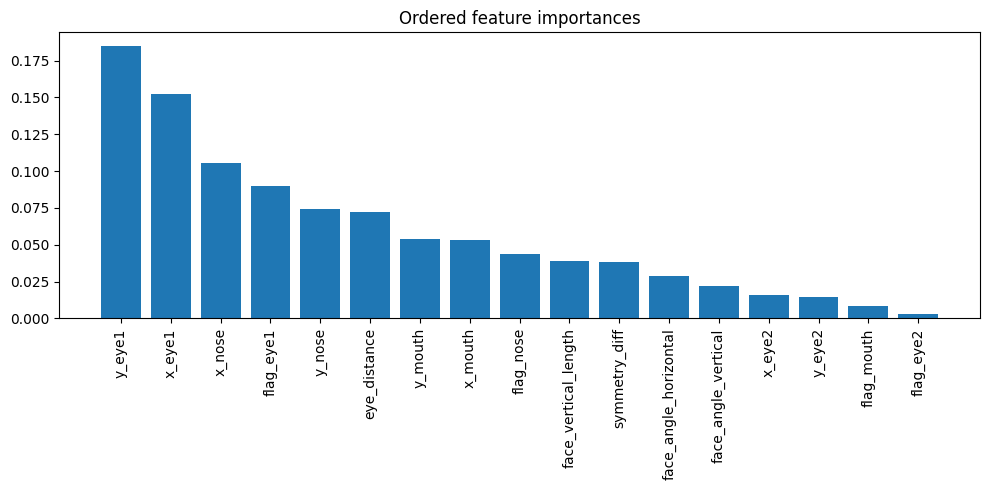

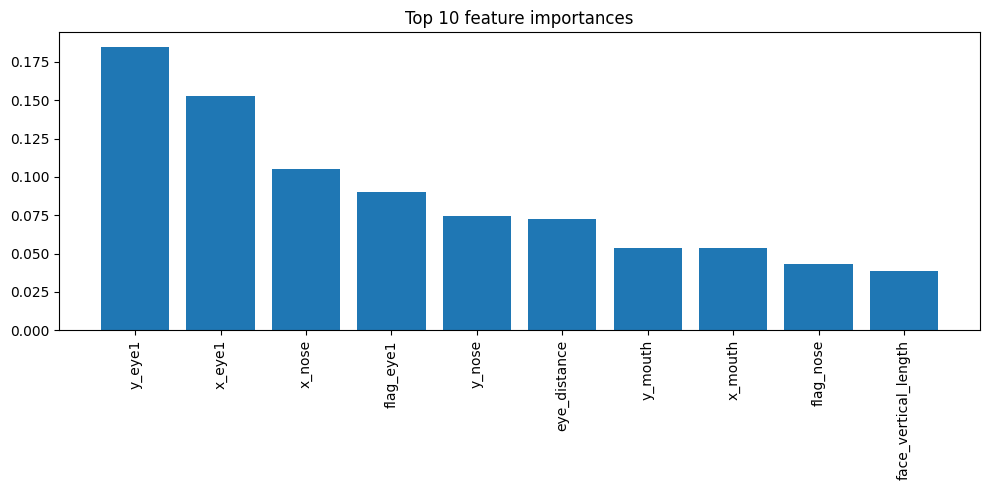

In [11]:
# Train
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Check feature importance
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
n_features = len(indices)

# Visualize all feature importances
plt.figure(figsize=(10, 5))
plt.title("Ordered feature importances")
plt.bar(range(n_features), importances[indices[:n_features]])
plt.xticks(range(n_features), [f"{features[i]}" for i in indices[:n_features]], rotation=90)
plt.tight_layout()

# Visualize top 10 feature importances
plt.figure(figsize=(10, 5))
plt.title("Top 10 feature importances")
plt.bar(range(10), importances[indices[:10]])
plt.xticks(range(10), [f"{features[i]}" for i in indices[:10]], rotation=90)
plt.tight_layout()
plt.show()


Dataset labels:----------------------------------------
{'baby_on_back': 1, 'baby_on_stomach': 2}

Report-------------------------------------------------
                 precision    recall  f1-score   support

   baby_on_back       0.94      0.79      0.86       115
baby_on_stomach       0.88      0.97      0.92       187

       accuracy                           0.90       302
      macro avg       0.91      0.88      0.89       302
   weighted avg       0.90      0.90      0.90       302

Confusion matrix---------------------------------------


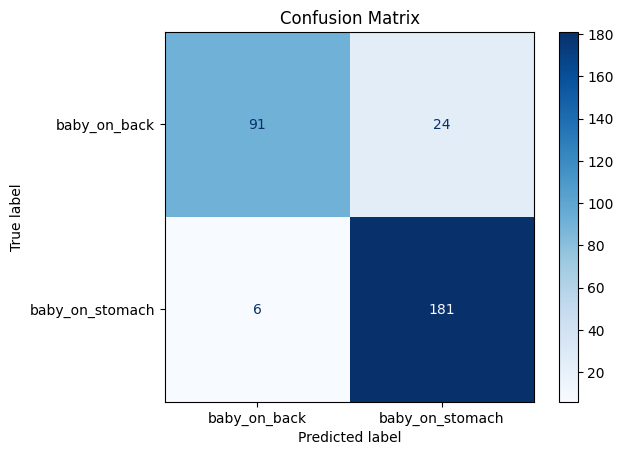

In [12]:
# Evaluate
classes_mlp = emb_builder.classes_mlp
evaluate_metrics(clf, X_test, y_test, classes_mlp)

**Re-train the model using only the top 10 features in the dataset**


Dataset labels:----------------------------------------
{'baby_on_back': 1, 'baby_on_stomach': 2}

Report-------------------------------------------------
                 precision    recall  f1-score   support

   baby_on_back       0.94      0.79      0.86       115
baby_on_stomach       0.88      0.97      0.92       187

       accuracy                           0.90       302
      macro avg       0.91      0.88      0.89       302
   weighted avg       0.90      0.90      0.90       302

Confusion matrix---------------------------------------


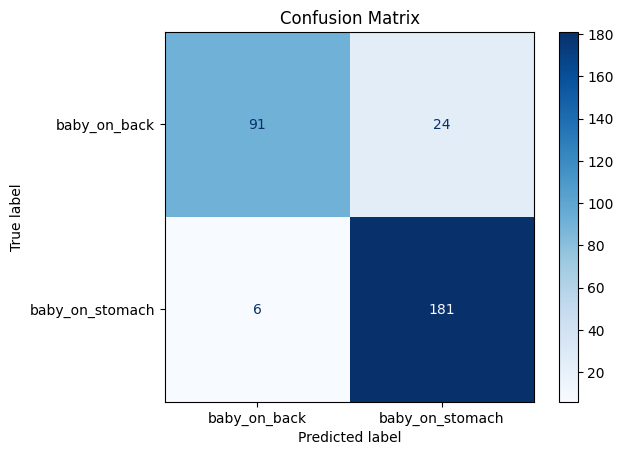

In [13]:
# Select the 10 most important features
top_k = 10
top_features_idx = indices[:top_k]

# Filter features
X_train_selected = X_train[:, top_features_idx]
X_test_selected = X_test[:, top_features_idx]

# Train
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_selected, y_train)

# Evaluate
classes_mlp = emb_builder.classes_mlp
evaluate_metrics(clf,X_test_selected, y_test, classes_mlp)

**Re-train the dataset using only the 5 top features in the dataset**


Dataset labels:----------------------------------------
{'baby_on_back': 1, 'baby_on_stomach': 2}

Report-------------------------------------------------
                 precision    recall  f1-score   support

   baby_on_back       0.93      0.77      0.84       115
baby_on_stomach       0.87      0.96      0.91       187

       accuracy                           0.89       302
      macro avg       0.90      0.86      0.88       302
   weighted avg       0.89      0.89      0.88       302

Confusion matrix---------------------------------------


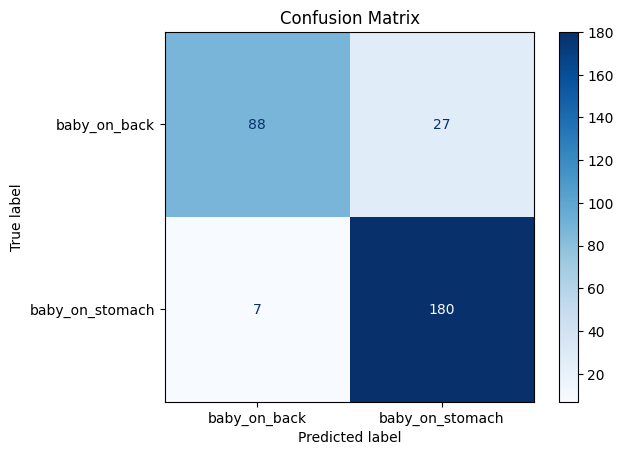

In [14]:
# Select the 5 most important features
top_k = 5
top_features_idx = indices[:top_k]

# Filter dataset
X_train_selected = X_train[:, top_features_idx]
X_test_selected = X_test[:, top_features_idx]

# Train
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_selected, y_train)

# Evaluate
classes_mlp = emb_builder.classes_mlp
evaluate_metrics(clf, X_test_selected, y_test, classes_mlp)

**All the features, try to optimize hyper-parameters exploiting grid search method**

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}

Dataset labels:----------------------------------------
{'baby_on_back': 1, 'baby_on_stomach': 2}

Report-------------------------------------------------
                 precision    recall  f1-score   support

   baby_on_back       0.93      0.79      0.85       115
baby_on_stomach       0.88      0.96      0.92       187

       accuracy                           0.90       302
      macro avg       0.91      0.88      0.89       302
   weighted avg       0.90      0.90      0.90       302

Confusion matrix---------------------------------------


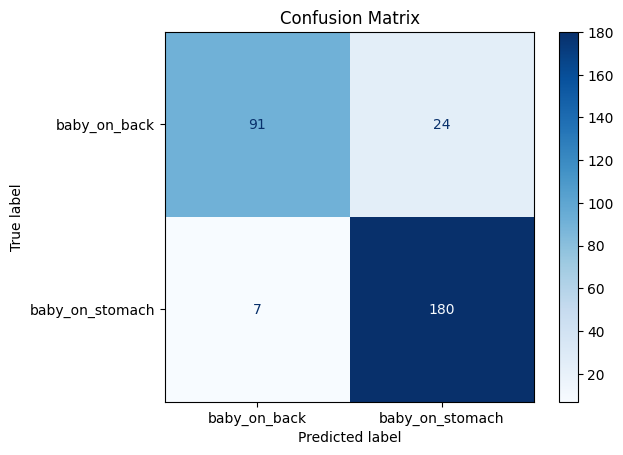

In [15]:
from sklearn.model_selection import GridSearchCV

# Possible hyper-parameters
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Base model
rf = RandomForestClassifier(random_state=42)

# Grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           verbose=1,
                           scoring='f1_macro')

# Train
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_

# Evaluate
classes_mlp = emb_builder.classes_mlp
print("Best parameters:", grid_search.best_params_)
evaluate_metrics(best_rf, X_test, y_test, classes_mlp)

# SVM

In [16]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

**All features + feature importance analysis**

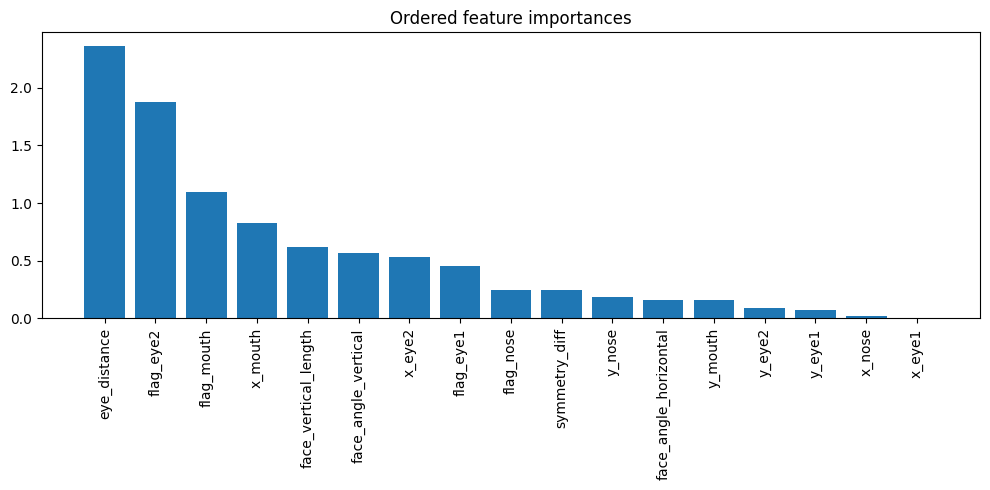

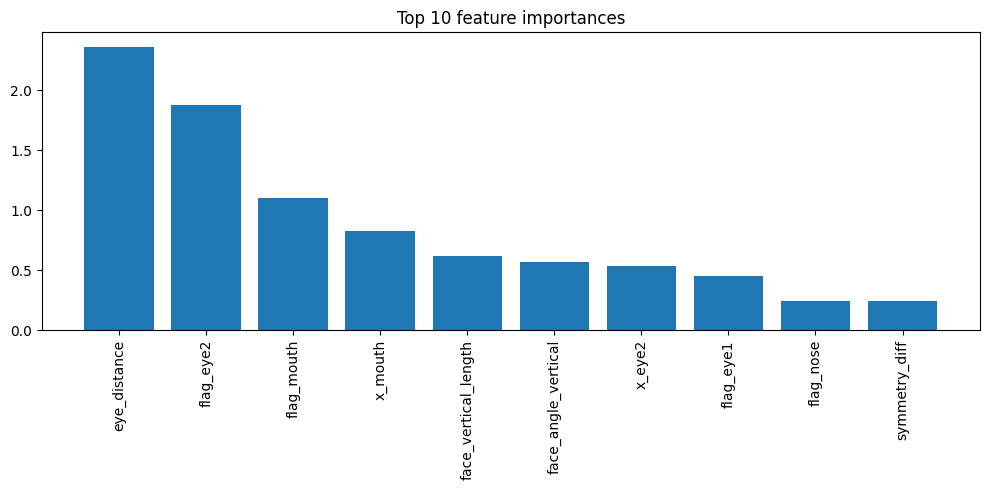

In [17]:
# Train
svm = make_pipeline(StandardScaler(), LinearSVC(random_state=42, max_iter=10000))
svm.fit(X_train, y_train)

# Check feature importance
linear_svm = svm.named_steps['linearsvc']
importances = np.abs(linear_svm.coef_).mean(axis=0)
indices = np.argsort(importances)[::-1]
n_features = len(indices)

# Visualize all feature importances
plt.figure(figsize=(10, 5))
plt.title("Ordered feature importances")
plt.bar(range(n_features), importances[indices[:n_features]])
plt.xticks(range(n_features), [f"{features[i]}" for i in indices[:n_features]], rotation=90)
plt.tight_layout()

# Visualize top 10 feature importances
plt.figure(figsize=(10, 5))
plt.title("Top 10 feature importances")
plt.bar(range(10), importances[indices[:10]])
plt.xticks(range(10), [f"{features[i]}" for i in indices[:10]], rotation=90)
plt.tight_layout()
plt.show()


Dataset labels:----------------------------------------
{'baby_on_back': 1, 'baby_on_stomach': 2}

Report-------------------------------------------------
                 precision    recall  f1-score   support

   baby_on_back       0.80      0.77      0.78       115
baby_on_stomach       0.86      0.88      0.87       187

       accuracy                           0.84       302
      macro avg       0.83      0.82      0.83       302
   weighted avg       0.84      0.84      0.84       302

Confusion matrix---------------------------------------


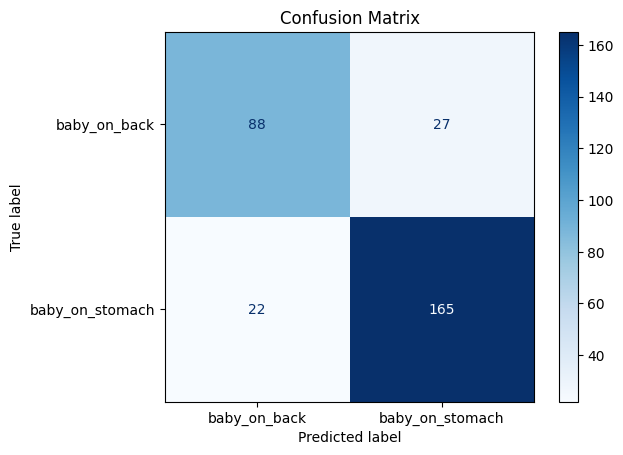

In [18]:
# Test
y_pred = svm.predict(X_test)

# Evaluate
evaluate_metrics(svm, X_test, y_test, classes_mlp)

**Re-train the model usign only the top 10 features in the dataset**


Dataset labels:----------------------------------------
{'baby_on_back': 1, 'baby_on_stomach': 2}

Report-------------------------------------------------
                 precision    recall  f1-score   support

   baby_on_back       0.81      0.78      0.80       115
baby_on_stomach       0.87      0.89      0.88       187

       accuracy                           0.85       302
      macro avg       0.84      0.84      0.84       302
   weighted avg       0.85      0.85      0.85       302

Confusion matrix---------------------------------------


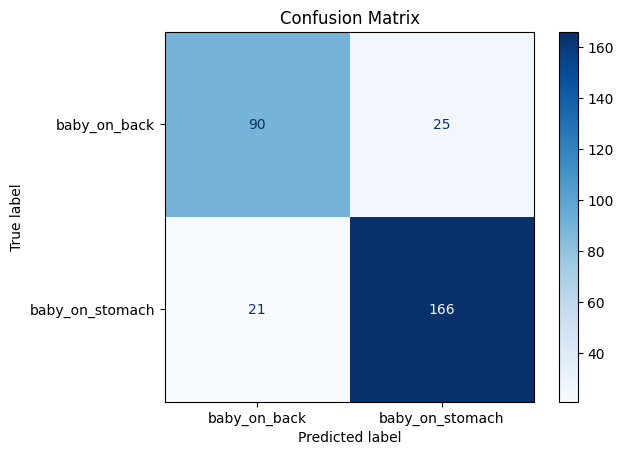

In [19]:
# Select the 10 most important features
top_k = 10
top_features_idx = indices[:top_k]

# Filter dataset
X_train_selected = X_train[:, top_features_idx]
X_test_selected = X_test[:, top_features_idx]

# Train
svm = make_pipeline(StandardScaler(), LinearSVC(random_state=42, max_iter=10000))
svm.fit(X_train_selected, y_train)

# Evaluate
classes_mlp = emb_builder.classes_mlp
evaluate_metrics(svm, X_test_selected, y_test, classes_mlp)

**All the features,try to optimize hyper-parameters exploiting grid search method**

Best parameters: {'linearsvc__C': 10, 'linearsvc__dual': False, 'linearsvc__loss': 'squared_hinge', 'linearsvc__penalty': 'l2'}

Dataset labels:----------------------------------------
{'baby_on_back': 1, 'baby_on_stomach': 2}

Report-------------------------------------------------
                 precision    recall  f1-score   support

   baby_on_back       0.81      0.77      0.79       115
baby_on_stomach       0.86      0.89      0.87       187

       accuracy                           0.84       302
      macro avg       0.83      0.83      0.83       302
   weighted avg       0.84      0.84      0.84       302

Confusion matrix---------------------------------------


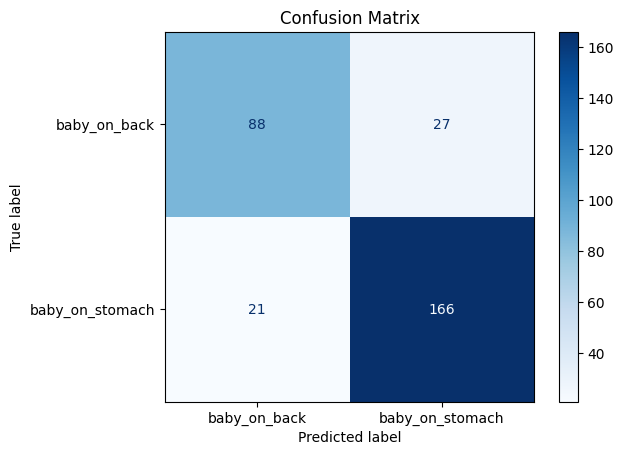

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipeline = make_pipeline(StandardScaler(), LinearSVC(random_state=42, max_iter=50000))

# Possible hyper-parameters
param_grid = {
    'linearsvc__C': [0.01, 0.1, 1, 10, 100],
    'linearsvc__penalty': ['l2'],  # 'l1' solo se dual=False
    'linearsvc__loss': ['squared_hinge'],
    'linearsvc__dual': [False],  # False se penalty='l1'
}

# Grid search
grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
grid.fit(X_train, y_train)
best_model = grid.best_estimator_

# Evaluate
print("Best parameters:", grid.best_params_)
evaluate_metrics(best_model, X_test, y_test, classes_mlp)

# LOGISTIC REGRESSION

**All features + feature importance**

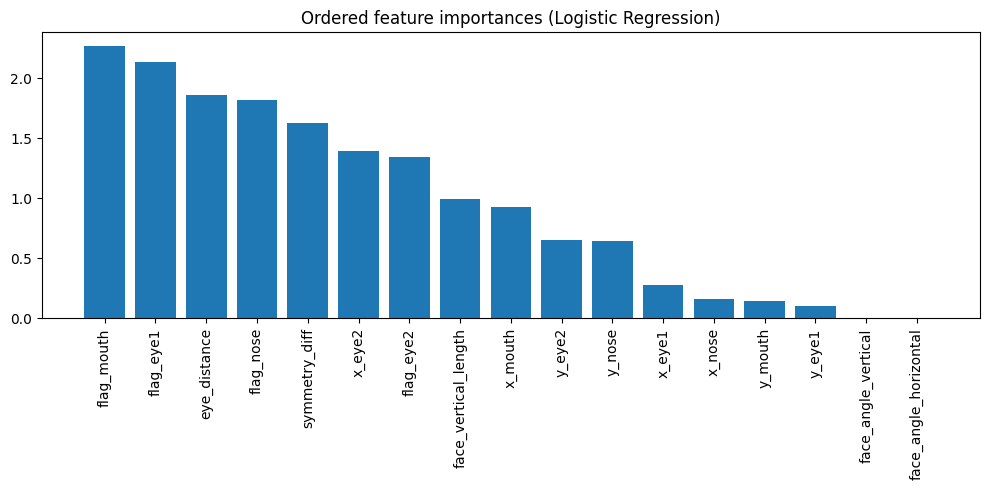

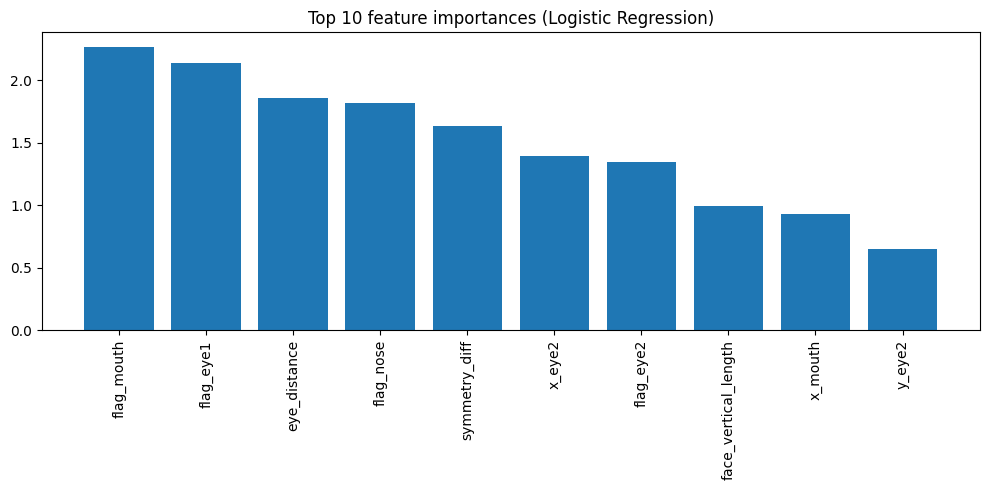

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Train
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Check feature importance
importances = np.abs(logreg.coef_).mean(axis=0)  # media se è multiclasse
indices = np.argsort(importances)[::-1]
n_features = len(indices)

# Visualize all features importance
plt.figure(figsize=(10, 5))
plt.title("Ordered feature importances (Logistic Regression)")
plt.bar(range(n_features), importances[indices])
plt.xticks(range(n_features), [features[i] for i in indices], rotation=90)
plt.tight_layout()

# Visualize top 10 features importance
plt.figure(figsize=(10, 5))
plt.title("Top 10 feature importances (Logistic Regression)")
plt.bar(range(10), importances[indices[:10]])
plt.xticks(range(10), [features[i] for i in indices[:10]], rotation=90)
plt.tight_layout()
plt.show()



Dataset labels:----------------------------------------
{'baby_on_back': 1, 'baby_on_stomach': 2}

Report-------------------------------------------------
                 precision    recall  f1-score   support

   baby_on_back       0.76      0.77      0.76       115
baby_on_stomach       0.85      0.85      0.85       187

       accuracy                           0.82       302
      macro avg       0.81      0.81      0.81       302
   weighted avg       0.82      0.82      0.82       302

Confusion matrix---------------------------------------


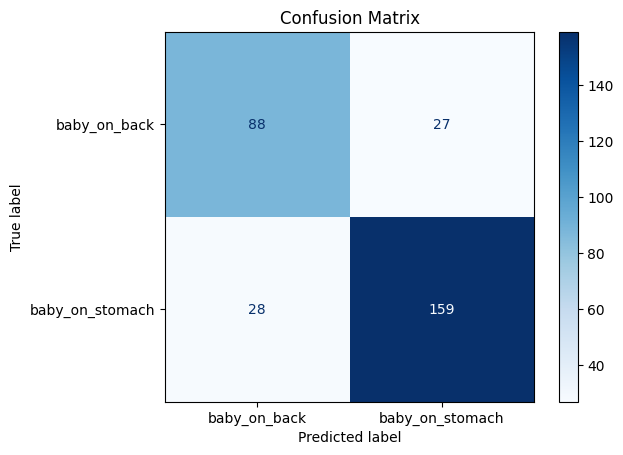

In [22]:
# Evaluate
classes_mlp = emb_builder.classes_mlp
evaluate_metrics(logreg, X_test, y_test, classes_mlp)

**Re-train the model using only the top 10 features in the dataset**


Dataset labels:----------------------------------------
{'baby_on_back': 1, 'baby_on_stomach': 2}

Report-------------------------------------------------
                 precision    recall  f1-score   support

   baby_on_back       0.76      0.76      0.76       115
baby_on_stomach       0.85      0.85      0.85       187

       accuracy                           0.81       302
      macro avg       0.80      0.80      0.80       302
   weighted avg       0.81      0.81      0.81       302

Confusion matrix---------------------------------------


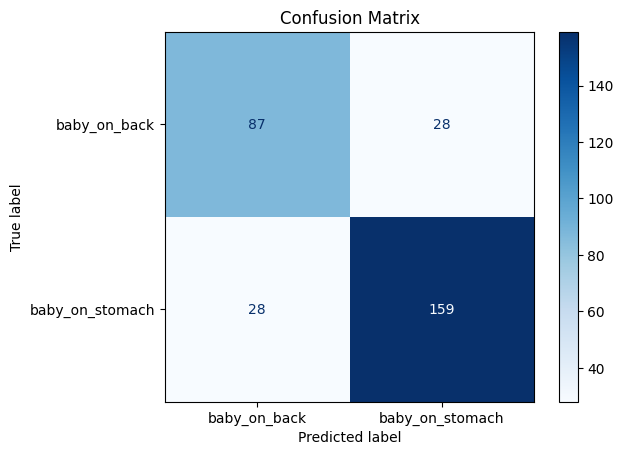

In [23]:
# Select the 10 most important features
top_k = 10
top_features_idx = indices[:top_k]

# Filter dataset
X_train_selected = X_train[:, top_features_idx]
X_test_selected = X_test[:, top_features_idx]

# Train
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_selected, y_train)

# Evaluate
classes_mlp = emb_builder.classes_mlp
evaluate_metrics(logreg, X_test_selected, y_test, classes_mlp)

**All features + grid search**

Best parameters: {'logisticregression__C': 100, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'lbfgs'}

Dataset labels:----------------------------------------
{'baby_on_back': 1, 'baby_on_stomach': 2}

Report-------------------------------------------------
                 precision    recall  f1-score   support

   baby_on_back       0.82      0.76      0.79       115
baby_on_stomach       0.86      0.90      0.88       187

       accuracy                           0.84       302
      macro avg       0.84      0.83      0.83       302
   weighted avg       0.84      0.84      0.84       302

Confusion matrix---------------------------------------


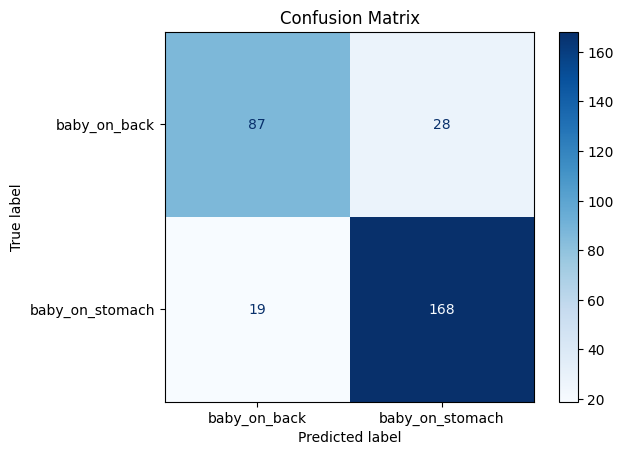

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.exceptions import ConvergenceWarning
import warnings

pipeline = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=5000, random_state=42)
)

# Possible hyper-parameters
param_grid = {
    'logisticregression__C': [0.01, 0.1, 1, 10, 100],  # regolarizzazione
    'logisticregression__penalty': ['l2'],             # 'l1' richiede solver='liblinear' o 'saga'
    'logisticregression__solver': ['lbfgs']            # 'liblinear' per piccoli dataset, 'saga' per grandi
}

# Grid search con gestione dei warning
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning)
    grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
    grid.fit(X_train, y_train)

best_model = grid.best_estimator_

# Evaluation
print("Best parameters:", grid.best_params_)
evaluate_metrics(best_model, X_test, y_test, classes_mlp)

# MLP

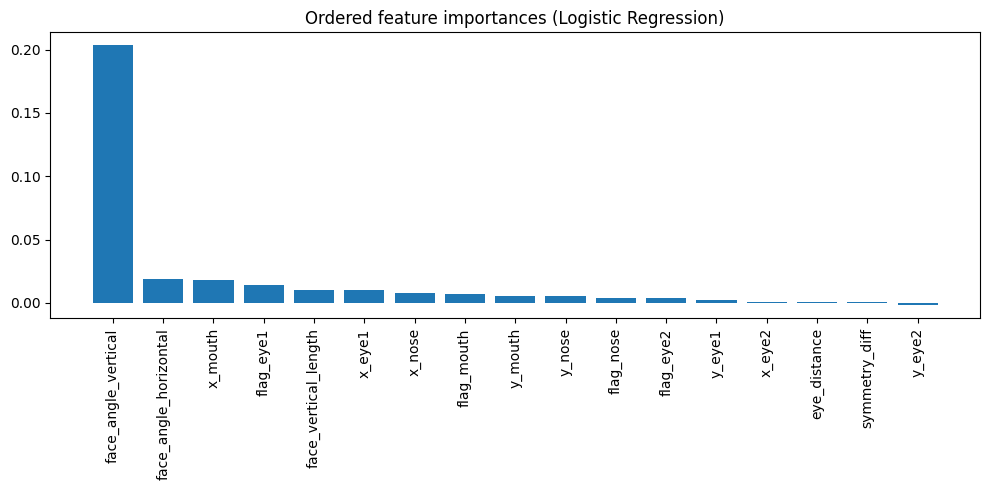

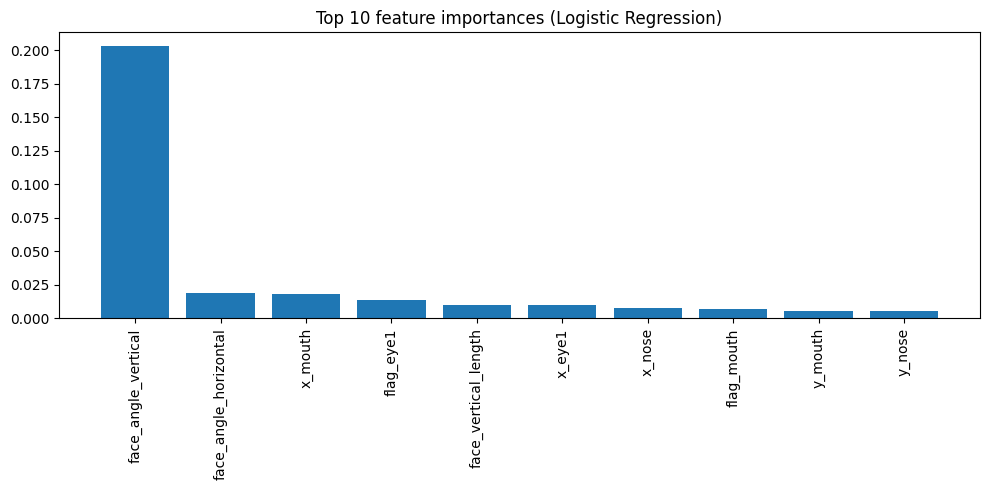


Dataset labels:----------------------------------------
{'baby_on_back': 1, 'baby_on_stomach': 2}

Report-------------------------------------------------
                 precision    recall  f1-score   support

   baby_on_back       0.78      0.75      0.76       115
baby_on_stomach       0.85      0.87      0.86       187

       accuracy                           0.82       302
      macro avg       0.82      0.81      0.81       302
   weighted avg       0.82      0.82      0.82       302

Confusion matrix---------------------------------------


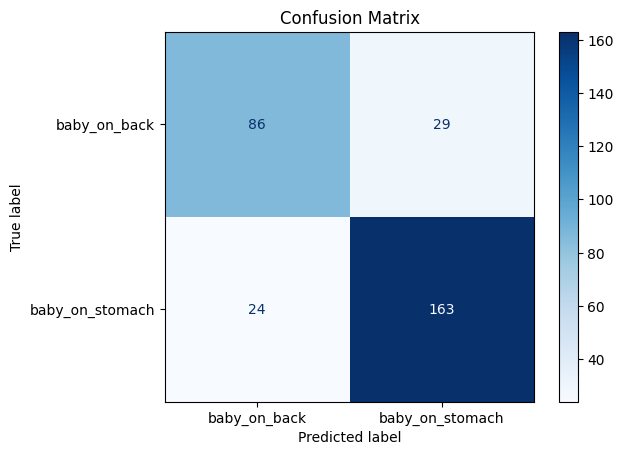

In [25]:
from sklearn.neural_network import MLPClassifier
from sklearn.inspection import permutation_importance

# Train
mlp = MLPClassifier(hidden_layer_sizes=(256, 128), activation='relu', max_iter=300, random_state=42)
mlp.fit(X_train, y_train)


# Check feature importance
result = permutation_importance(mlp, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)
importances = result.importances_mean
indices = np.argsort(importances)[::-1]

# Visualize all features importance
plt.figure(figsize=(10, 5))
plt.title("Ordered feature importances (Logistic Regression)")
plt.bar(range(n_features), importances[indices])
plt.xticks(range(n_features), [features[i] for i in indices], rotation=90)
plt.tight_layout()

# Visualize top 10 features importance
plt.figure(figsize=(10, 5))
plt.title("Top 10 feature importances (Logistic Regression)")
plt.bar(range(10), importances[indices[:10]])
plt.xticks(range(10), [features[i] for i in indices[:10]], rotation=90)
plt.tight_layout()
plt.show()

# Evaluate
classes_mlp = emb_builder.classes_mlp
evaluate_metrics(mlp, X_test, y_test, classes_mlp)

**Re-train the model using only the top 10 features in the dataset**


Dataset labels:----------------------------------------
{'baby_on_back': 1, 'baby_on_stomach': 2}

Report-------------------------------------------------
                 precision    recall  f1-score   support

   baby_on_back       0.77      0.65      0.71       115
baby_on_stomach       0.80      0.88      0.84       187

       accuracy                           0.79       302
      macro avg       0.79      0.77      0.77       302
   weighted avg       0.79      0.79      0.79       302

Confusion matrix---------------------------------------


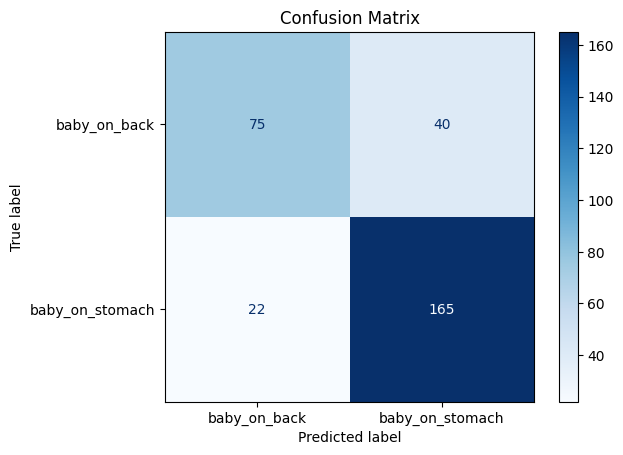

In [26]:
# Select the 10 most important features
top_k = 10
top_features_idx = indices[:top_k]

# Filter dataset
X_train_selected = X_train[:, top_features_idx]
X_test_selected = X_test[:, top_features_idx]

# Train
mlp = MLPClassifier(hidden_layer_sizes=(256, 128), activation='relu', max_iter=300, random_state=42)
mlp.fit(X_train_selected, y_train)

# Evaluate
classes_mlp = emb_builder.classes_mlp
evaluate_metrics(mlp, X_test_selected, y_test, classes_mlp)

# Future improvement:
* XBOOST